<a href="https://colab.research.google.com/github/viniciusrpb/cloud_image_segmentation/blob/main/cloud_segmentation_cnn_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow==2.6.0
!pip install keras~=2.6.0
!pip install tensorflow_addons
!pip install keras-segmentation
!pip install segmentation_models

     |████████████████████████████████| 458.3 MB 9.2 kB/s 
     |████████████████████████████████| 132 kB 14.9 MB/s 
     |████████████████████████████████| 14.8 MB 263 kB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=791e561fbb560fdcefbf8a5c7196d591ce02b8fb1f8d029ba53de71097094d71
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68717 sha256=06bd2bcd3917b8efd3dfd4632a124afbc77d3ea3704904364968bad5b71f58a7
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built clang wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: numpy
    Found existing installation: numpy 

     |████████████████████████████████| 1.3 MB 8.6 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


     |████████████████████████████████| 1.1 MB 8.1 MB/s 
     |████████████████████████████████| 3.3 MB 10.8 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29071 sha256=f232da64fb75ebb8d2e6352511653ec99b2ffb60e534729da17580b2d9785b43
  Stored in directory: /root/.cache/pip/wheels/68/dc/b3/596a3e2461ba16e935ef31661c26e823f841cfb577cec4c47a
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 50 kB 5.6 MB/s 


In [24]:
!cp -r "/content/drive/My Drive/img_satelite" "img_satelite"

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,GlobalAveragePooling2D ,MaxPooling2D,Activation,Flatten,Conv2D,BatchNormalization,Dropout,concatenate, LeakyReLU
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow_addons as tfa
import segmentation_models as sm
import keras_segmentation
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
  
from keras.models import *
from keras.layers import *
sm.set_framework('tf.keras')

sm.framework()

'tf.keras'

In [41]:
path_train = 'img_satelite/goes16_RGB1'
path_validation = 'img_satelite/goes16_RGB2'
path_test = 'img_satelite/goes16_RGB2'

Function to display images

In [ ]:
def display(display_list,title=['Input Image', 'True Mask', 'Predicted Mask']):
  plt.figure(figsize=(15, 15))
  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]),cmap='magma')
    plt.axis('off')
  plt.show()

Hyperparameters

In [10]:
num_classes = 2
batch_size = 8
epochs = 20
height = 400
width = 400
channels = 3

# Pretrained model


In [ ]:
batch_size = 20
epochs = 100


train_gen = train_generator(train_df, batch_size, 
                          None, 
                          train_generator_args,
                          aug_img_dir, aug_mask_dir, 
                          aug_img_prefix, aug_mask_prefix,
                          aug_format,
                          (height, width))


Read the images

In [40]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
image_datagen = ImageDataGenerator(rescale=1./255,**options)
mask_datagen = ImageDataGenerator(**options)

train_image_generator = image_datagen.flow_from_directory(PATH+'train_imgs',seed=seed, target_size=self.target_size,class_mode=None,batch_size = self.batch_size)
train_mask_generator = mask_datagen.flow_from_directory(PATH+'train_masks',seed=seed, target_size=self.target_size,class_mode=None,batch_size = self.batch_size)
train_generator = combine_generator(train_image_generator, train_mask_generator,training=True)

val_image_generator = val_datagen.flow_from_directory(PATH+'val_imgs',seed=seed, target_size=self.target_size,class_mode=None,batch_size = self.batch_size)
val_mask_generator = val_datagen_mask.flow_from_directory(PATH+'val_masks',seed=seed, target_size=self.target_size,class_mode=None,batch_size = self.batch_size)
self.val_generator = combine_generator(val_image_generator, val_mask_generator,training=False)

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(path_train,
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical', 
                                                    target_size = (224, 224))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  validation_datagen.flow_from_directory( path_validation,
                                                          batch_size  = batch_size,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

test_generator =  test_datagen.flow_from_directory( path_test,
                                                          batch_size  = batch_size,
                                                          class_mode  = 'categorical', 
                                                          target_size = (224, 224))

Found 131 images belonging to 2 classes.
Found 21 images belonging to 2 classes.
Found 27 images belonging to 2 classes.


Hyper-parameters

In [ ]:
number_of_neurons = 100
number_of_classes = validation_generator.class_indices

Lets see some samples

In [11]:
input_shape = (height, width, channels)

base_vgg = VGG16(include_top = False, weights = "imagenet", input_shape = input_shape)

# freezing all layers in VGG16 
for layer in base_vgg.layers: 
    layer.trainable = False

# the bridge (exclude the last maxpooling layer in VGG16) 
bridge = base_vgg.get_layer("block5_conv3").output
print(bridge.shape)

# Decoder now
up1 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bridge)
print(up1.shape)
concat_1 = concatenate([up1, base_vgg.get_layer("block4_conv3").output], axis=3)
conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(concat_1)
conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

up2 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
print(up2.shape)
concat_2 = concatenate([up2, base_vgg.get_layer("block3_conv3").output], axis=3)
conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(concat_2)
conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

up3 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
print(up3.shape)
concat_3 = concatenate([up3, base_vgg.get_layer("block2_conv2").output], axis=3)
conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(concat_3)
conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

up4 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
print(up4.shape)
concat_4 = concatenate([up4, base_vgg.get_layer("block1_conv2").output], axis=3)
conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat_4)
conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)
print(conv10.shape)

unet_model = Model(inputs=[base_vgg.input], outputs=[conv10])
unet_model.summary()

(None, 25, 25, 512)
(None, 50, 50, 512)
(None, 100, 100, 256)
(None, 200, 200, 128)
(None, 400, 400, 64)
(None, 400, 400, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 400, 400, 64  1792        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 400, 400, 64  36928       ['b

In [12]:
#f1_score = tfa.metrics.F1Score(num_classes=2, average='micro',threshold=0.5)

unet_model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, 
                    metrics=[iou, dice_coef, 'binary_accuracy'])

#model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001,decay=0.01), 
#              loss = 'categorical_crossentropy', 
#              metrics = 'accuracy')
            #metrics = ['accuracy',f1_score])

In [ ]:
history = unet_model.fit_generator(train_gen,
                                    steps_per_epoch=len(df)//batch_size,
                                    epochs=epochs,
                                    callbacks=callbacks_list,
                                    validation_data = test_gen, 
                                    validation_steps = len(test_df)//batch_size,
                                    verbose=1)


Epoch 1/20
17/17 [==============================] - 8s 177ms/step - loss: 0.8000 - accuracy: 0.5649 - val_loss: 0.6065 - val_accuracy: 0.6667
Epoch 2/20
17/17 [==============================] - 1s 51ms/step - loss: 0.5177 - accuracy: 0.7786 - val_loss: 0.4622 - val_accuracy: 0.8095
Epoch 3/20
17/17 [==============================] - 1s 52ms/step - loss: 0.3891 - accuracy: 0.8855 - val_loss: 0.3666 - val_accuracy: 0.9048
Epoch 4/20
17/17 [==============================] - 1s 53ms/step - loss: 0.3332 - accuracy: 0.9160 - val_loss: 0.3085 - val_accuracy: 1.0000
Epoch 5/20
17/17 [==============================] - 1s 51ms/step - loss: 0.3038 - accuracy: 0.9008 - val_loss: 0.2609 - val_accuracy: 1.0000
Epoch 6/20
17/17 [==============================] - 1s 53ms/step - loss: 0.2455 - accuracy: 0.9618 - val_loss: 0.2274 - val_accuracy: 1.0000
Epoch 7/20
17/17 [==============================] - 1s 51ms/step - loss: 0.2111 - accuracy: 0.9542 - val_loss: 0.2009 - val_accuracy: 1.0000
Epoch 8/20
1

In [ ]:
#f1 = history_fine.history['f1_score']
#val_f1 = history_fine.history['val_f1_score']

#plt.figure(figsize=(8, 8))
#plt.subplot(2, 1, 1)
#plt.plot(f1, label='Training F1-Score')
#plt.plot(val_f1, label='Validation F1-Score')
#plt.legend(loc='lower right')
#plt.ylabel('F1-Score')
#plt.ylim([min(plt.ylim()),1])
#plt.title('Training and Validation F1-Score')


Text(0.5, 1.0, 'Training and Validation F1-Score')

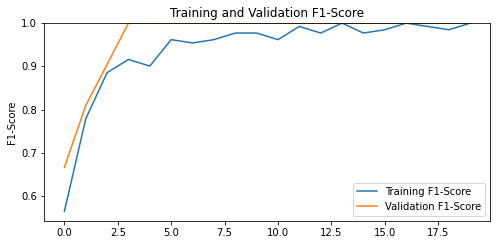

In [ ]:
f1 = history_fine.history['accuracy']
val_f1 = history_fine.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(f1, label='Training F1-Score')
plt.plot(val_f1, label='Validation F1-Score')
plt.legend(loc='lower right')
plt.ylabel('F1-Score')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation F1-Score')


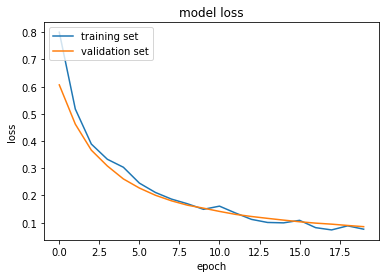

In [ ]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper left')
plt.show()

In [ ]:
y_prob = model.predict(test_generator,batch_size=batch_size)
y_pred = np.argmax(y_prob,axis=1)

print(classification_report(y_pred,test_generator.classes))

              precision    recall  f1-score   support

           0       0.31      0.36      0.33        11
           1       0.50      0.44      0.47        16

    accuracy                           0.41        27
   macro avg       0.40      0.40      0.40        27
weighted avg       0.42      0.41      0.41        27



In [ ]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0])

In [ ]:
import plotly.figure_factory as ff

y_true = test_generator.classes

z = confusion_matrix(y_true, y_pred)

x = list(test_generator.class_indices.keys())

y = list(test_generator.class_indices.keys())


In [ ]:
# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure 
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()